<a href="https://www.kaggle.com/code/yunasheng/eda-sachin-tendulkar-century-analysis?scriptVersionId=168492114" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/kaggle/input/sachin-tendulkar-all-international-centuries/Sachin-Tendulkar-All-International-Cricket-Centuries.csv")

In [3]:
df.head(10)


,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,119*,England,6,4,"Old Trafford, Manchester",Away,09-Aug-90,Drawn
1,2,148*,Australia,6,2,"Sydney Cricket Ground, Sydney",Away,02-Jan-92,Drawn
2,3,114,Australia,4,2,"WACA Ground, Perth",Away,01-Feb-92,Lost
3,4,111,South Africa,4,2,"Wanderers Stadium, Johannesburg",Away,26-Nov-92,Drawn
4,5,165,England,4,1,"M. A. Chidambaram Stadium, Chennai",Home,11-Feb-93,Won
5,6,104*,Sri Lanka,4,3,"Sinhalese Sports Club Ground, Colombo",Away,27-Jul-93,Won
6,7,142,Sri Lanka,4,1,"K. D. Singh Babu Stadium, Lucknow",Home,18-Jan-94,Won
7,8,110,Australia,2,1,"R. Premadasa Stadium, Colombo",Neutral,09-Sep-94,Won
8,9,115,New Zealand,2,2,"IPCL Sports Complex Ground, Vadodara",Home,28-Oct-94,Won
9,10,105,West Indies,2,1,"Sawai Mansingh Stadium, Jaipur",Home,11-Nov-94,Won


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       100 non-null    int64 
 1   Score     100 non-null    object
 2   Against   100 non-null    object
 3   Position  100 non-null    int64 
 4   Innings   100 non-null    int64 
 5   Venue     100 non-null    object
 6   Ground    100 non-null    object
 7   Date      100 non-null    object
 8   Result    100 non-null    object
dtypes: int64(3), object(6)
memory usage: 7.2+ KB


In [5]:
df['Score']=df['Score'].astype(str)

df['Score'] = df['Score'].str.replace(r'[^\w\s]', '')
df['Score'] = pd.to_numeric(df['Score'], errors='coerce').fillna(0).astype(int)
df['Score']=df['Score'].astype(str).astype(int)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_18/2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df.drop(columns=["No."], axis=1, inplace=True)

In [8]:
df.isnull().mean()*100

Score       0.0
Against     0.0
Position    0.0
Innings     0.0
Venue       0.0
Ground      0.0
Date        0.0
Result      0.0
dtype: float64

In [9]:
df.describe()

,Score,Position,Innings,Date
count,100.000000,100.000000,100.000000,100
mean,92.200000,3.140000,1.630000,2001-10-20 12:43:12
min,0.000000,1.000000,1.000000,1990-08-09 00:00:00
25%,0.000000,2.000000,1.000000,1997-11-04 00:00:00
50%,112.000000,4.000000,1.000000,2000-12-01 12:00:00
75%,141.000000,4.000000,2.000000,2006-10-18 18:00:00
max,217.000000,6.000000,4.000000,2012-03-16 00:00:00
std,66.752823,1.206213,0.786952,NaN


In [10]:
df.duplicated().sum()

0

In [11]:
df2=df.sort_values(by="Score", ascending=False).head(10)
df2[["Score","Against"]]

,Score,Against
43,217,New Zealand
94,214,Australia
93,203,Sri Lanka
62,193,England
10,179,West Indies
27,177,Australia
17,177,England
58,176,Zimbabwe
63,176,West Indies
86,175,Australia


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' New Zealand'),
  Text(1, 0, ' Australia'),
  Text(2, 0, ' Sri Lanka'),
  Text(3, 0, ' England'),
  Text(4, 0, ' West Indies'),
  Text(5, 0, ' Zimbabwe')])

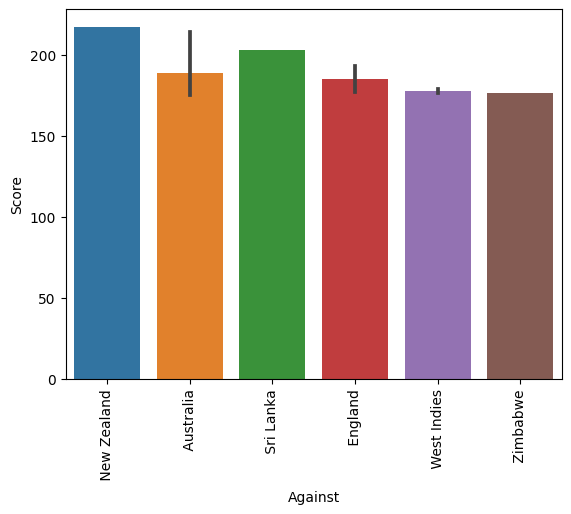

In [12]:
sns.barplot(data=df2,x="Against",y="Score")
plt.xticks(rotation=90)